# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import functions from file functions.py
from functions import creat_count_plot, data_exploration

# magic word for producing visualizations in notebook
%matplotlib inline

import seaborn as sns

#import clean_data from file process_data.py
from process_data import clean_data

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np

In [2]:
from IPython.display import display
#see all columns when we displaz a pd.DataFrame
pd.options.display.max_columns = None

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE",      For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

### Part 0.1: Data exploration

`**Quality - AZDIAS & CUSTOMERS**

- `ALTER_KIND4`, `ALTER_KIND3`, `ALTER_KIND2`, `ALTER_KIND1`, `EXTSEL992`, `KK_KUNDENTYP` have above 50% null values.
`CAMEO_DEU_2015`
- XX-->np.NaN
- converted to float

`CAMEO_DEUG_2015`
- X-->np.NaN
- converted to float

-`CAMEO_INTL_2015`
- converted to float 
- XX --> np.NaN

`D19_LETZTER_KAUF_BRANCHE`
- factorized

`EINGEFUEGT_AM`
- to_datetime 
- ordinal

`OST_WEST_KZ`
- factorized

`PRODUCT_GROUP`
- factorized

`CUSTOMER_GROUP`
- factorized

Azdias and customers had bascially identical data quality issues.


In [3]:
# load in the data
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=',', nrows= 200000, index_col= 0 )
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=',', index_col= "Unnamed: 0")

/tmp/ipykernel_443/4208459413.py:2: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=',', nrows= 200000, index_col= 0 )
/tmp/ipykernel_443/4208459413.py:3: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=',', index_col= "Unnamed: 0")


### Part 0.1: Data exploration

In [4]:
data_exploration(azdias)

SHAPE
(200000, 366)


NUMBER OF UNIQUES

LNR                           200000
EINGEFUEGT_AM                   3521
KBA13_ANZAHL_PKW                1259
ANZ_HAUSHALTE_AKTIV              219
ANZ_STATISTISCHE_HAUSHALTE       198
GEBURTSJAHR                      114
EXTSEL992                         56
VERDICHTUNGSRAUM                  46
CAMEO_DEU_2015                    45
CAMEO_INTL_2015                   43
LP_LEBENSPHASE_FEIN               41
D19_LETZTER_KAUF_BRANCHE          35
EINGEZOGENAM_HH_JAHR              33
MIN_GEBAEUDEJAHR                  32
ALTERSKATEGORIE_FEIN              26
ALTER_HH                          22
ANZ_PERSONEN                      20
CAMEO_DEUG_2015                   19
ALTER_KIND1                       17
ALTER_KIND2                       17
dtype: int64


NUMBER OF ABSOLUTE NULLS
ALTER_KIND4                    199733
ALTER_KIND3                    198599
ALTER_KIND2                    193294
ALTER_KIND1                    181677
EXTSEL992                  

In [5]:
azdias[azdias.columns[10:20]]

,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,2.0,12.0,0.0,3.0,6.0,8A,8.0,51.0
2,0.0,0.0,1.0,7.0,0.0,3.0,2.0,4C,4.0,24.0
3,0.0,0.0,0.0,2.0,0.0,2.0,4.0,2A,2.0,12.0
4,0.0,0.0,4.0,3.0,0.0,4.0,2.0,6B,6.0,43.0
...,...,...,...,...,...,...,...,...,...,...
199995,0.0,0.0,3.0,1.0,0.0,4.0,2.0,1D,1.0,15.0
199996,0.0,0.0,2.0,17.0,0.0,4.0,7.0,9B,9.0,51.0
199997,0.0,0.0,2.0,1.0,0.0,4.0,6.0,7A,7.0,41.0
199998,0.0,0.0,3.0,1.0,0.0,1.0,6.0,2C,2.0,14.0


In [6]:
azdias.columns[azdias.isnull().mean() > 0.5]

Index(['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'EXTSEL992',
       'KK_KUNDENTYP'],
      dtype='object')

With the help of the cell above, we can see that the columns
- `ALTER_KIND4`,
- `ALTER_KIND3`,
- `ALTER_KIND2`,
- `ALTER_KIND1`, 
- `EXTSEL992`,
- `KK_KUNDENTYP`,

have above 50% null values. 

In [7]:
null_ratio = azdias.isnull().mean()

To get a better overview, we can also plot the ratio of null values

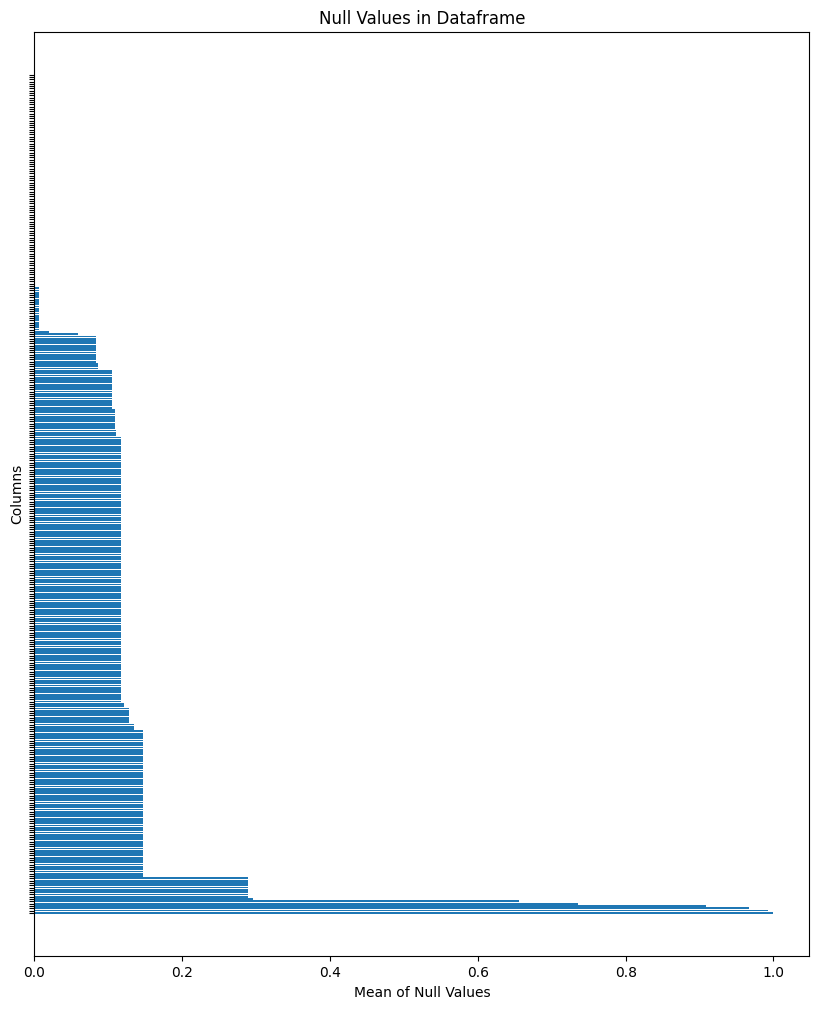

In [8]:
null_ratio = azdias.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
# create a bar plot of null counts
plt.barh(null_ratio.index, null_ratio.values)
plt.title('Null Values in Dataframe')
plt.ylabel('Columns')
plt.xlabel('Mean of Null Values')

plt.tick_params(labelleft=False)



Columns which have a high ratio of null values (above 0.5) shall  be discarded as they are not suitable for machine learning. This will be done in the section Preprocessing.

In [9]:
azdias.dtypes.value_counts()

float64    267
int64       93
object       6
dtype: int64

The majority of the columns are integer or float. This is good. Let us see which columns are objects.


In [10]:
azdias.select_dtypes(include='object').columns

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')

To get a quick overview about the columns that have be cleaned, we can look at the numbers of unique values. 

In [11]:
count_dict={}

for column in azdias.columns:
    unique_count = len(azdias[column].unique())

    count_dict[column] = unique_count

df_unique_count = pd.DataFrame(index=count_dict.keys(), data= count_dict.values(), columns= ["unique_count"])


In [12]:
df_unique_count

,unique_count
LNR,200000
AGER_TYP,5
AKT_DAT_KL,10
ALTER_HH,23
ALTER_KIND1,18
...,...
WOHNDAUER_2008,10
WOHNLAGE,9
ZABEOTYP,6
ANREDE_KZ,2


In [13]:
df_unique_count.sort_values(by = "unique_count", ascending= False).head(20)

,unique_count
LNR,200000
EINGEFUEGT_AM,3522
KBA13_ANZAHL_PKW,1260
ANZ_HAUSHALTE_AKTIV,220
ANZ_STATISTISCHE_HAUSHALTE,199
GEBURTSJAHR,114
EXTSEL992,57
VERDICHTUNGSRAUM,47
CAMEO_DEU_2015,46
CAMEO_INTL_2015,44


The task of the udacity project is to Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS").

Even when we discard the columns which have above 50% of null values, 360 columns to analyze is too much. We have to decide on certain columns which help us solve the task.

There are two informational excel which describe the data:

- DIAS Information Levels - Attributes 2017.xlsx
- DIAS Attributes - Values 2017.xlsx

DIAS Information Levels - Attributes 2017.xlsx

In this excel, we can see that the data can be divided into different `information levels`

- Person
- Household
- Building
- Microcell (RR4_ID)
- Microcell (RR3_ID)
- 125m x 125m Grid
- Postcode 
- RR1_ID
- PLZ8
- Community

In [14]:
person = [
"AGER_TYP",
"ALTERSKATEGORIE_GROB",
"ANREDE_KZ",
"CJT_GESAMTTYP",
"FINANZ_MINIMALIST",
"FINANZ_SPARER",
"FINANZ_VORSORGER",
"FINANZ_ANLEGER",
"FINANZ_UNAUFFAELLIGER",
"FINANZ_HAUSBAUER",
"FINANZTYP",
"GEBURTSJAHR",
"GFK_URLAUBERTYP",
"GREEN_AVANTGARDE",
"HEALTH_TYP",
"LP_LEBENSPHASE_FEIN",
"LP_LEBENSPHASE_GROB",
"LP_FAMILIE_FEIN",
"LP_FAMILIE_GROB",
"LP_STATUS_FEIN",
"LP_STATUS_GROB",
"NATIONALITAET_KZ",
"PRAEGENDE_JUGENDJAHRE",
"RETOURTYP_BK_S",
"SEMIO_SOZ",
"SEMIO_FAM",
"SEMIO_REL",
"SEMIO_MAT",
"SEMIO_VERT",
"SEMIO_LUST",
"SEMIO_ERL",
"SEMIO_KULT",
"SEMIO_RAT",
"SEMIO_KRIT",
"SEMIO_DOM",
"SEMIO_KAEM",
"SEMIO_PFLICHT",
"SEMIO_TRADV",
"SHOPPER_TYP",
#"SOHO_FLAG",
"TITEL_KZ",
"VERS_TYP",
"ZABEOTYP",]


In [15]:
azdias[person]

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,TITEL_KZ,VERS_TYP,ZABEOTYP
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,-1,3
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,0.0,2,5
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,1,5
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,1,3
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,4,1,2.0,5,1,5,1,1,3,6,1949,4.0,1,1,36.0,12.0,11.0,5.0,7.0,3.0,1,7,5.0,6,2,2,6,7,7,3,4,1,3,3,1,4,1,3,0.0,1,1
199996,-1,1,2,4.0,1,5,2,5,3,5,1,1992,12.0,0,3,1.0,1.0,1.0,1.0,2.0,1.0,1,14,1.0,5,4,7,4,2,2,2,5,7,4,7,6,6,6,0,0.0,2,5
199997,-1,2,1,4.0,4,2,4,2,3,1,6,1968,3.0,1,2,39.0,12.0,11.0,5.0,10.0,5.0,1,11,3.0,7,7,6,7,6,2,1,7,4,1,4,2,5,5,1,0.0,1,1
199998,1,3,2,6.0,5,1,5,2,1,3,6,1952,11.0,0,3,38.0,12.0,10.0,5.0,9.0,4.0,1,5,5.0,1,1,3,2,1,4,6,3,4,4,4,5,5,2,3,0.0,1,3


This could also be done for the information levels `Household`, `Building` etc.
Due to size, it does not make sense to look at each column individually. Therefore, we will only look at the object columns:

- `CAMEO_DEU_2015`
- `CAMEO_DEUG_2015`, 
- `CAMEO_INTL_2015`,
- `D19_LETZTER_KAUF_BRANCHE`,
- `EINGEFUEGT_AM`,
- `OST_WEST_KZ`

`CAMEO_DEU_2015`

In [16]:
azdias["CAMEO_DEU_2015"].value_counts()

6B    12884
8A    11993
4C    10655
3C     7983
2D     7850
7A     7835
3D     7555
8B     7551
4A     7436
8C     6897
9D     6506
9B     6051
9C     5704
7B     5423
9A     4690
2C     4190
8D     3862
6E     3476
5D     3387
2B     3357
6C     3290
2A     3042
5A     2727
1D     2720
1A     2486
5B     2394
3A     2279
5C     2246
7C     2175
4B     2026
4D     1885
3B     1663
6A     1498
9E     1352
6D     1350
7D     1284
6F     1206
4E     1165
1E     1083
7E     1012
1C      987
5F      986
1B      939
5E      821
XX       79
Name: CAMEO_DEU_2015, dtype: int64

- 6B: Petty Bourgeois
- 8A: Multi-culteral
- 4C: String Trimmer
- 2D: Fine Management
- 3C: Rural neighbourhood

quality: 

- XX to be replaced with NaN
- factorize

`CAMEO_DEUG_2015`

In [17]:
azdias['CAMEO_DEUG_2015'].value_counts()

8      16612
8.0    13691
9      13169
6      12901
4      12601
9.0    11134
6.0    10803
3      10614
4.0    10566
2      10167
7       9598
3.0     8866
2.0     8272
7.0     8131
5       6867
5.0     5694
1       4446
1.0     3769
X         79
Name: CAMEO_DEUG_2015, dtype: int64

quality: 
- `X` string, 
- mixture between int and float

`CAMEO_INTL_2015`

In [18]:
azdias["CAMEO_INTL_2015"].value_counts()

51      16536
51.0    13718
41      11274
24      11124
41.0     9535
24.0     9399
14       7665
43       7018
14.0     6301
43.0     5866
54       5663
25       4740
54.0     4693
22       4027
25.0     3980
22.0     3409
23       3324
13       3233
45       3106
55       2861
23.0     2644
13.0     2610
45.0     2588
52       2494
55.0     2353
34       2288
31       2285
52.0     2196
15       2015
31.0     1940
34.0     1920
44       1813
15.0     1788
12       1700
44.0     1477
12.0     1342
32       1321
35       1256
33       1232
35.0     1080
32.0     1073
33.0     1014
XX         79
Name: CAMEO_INTL_2015, dtype: int64

quality:

- mixture between float and int
- XX a string, shall be replaced to -1 so column can be translated to float.

- 51 Poorer Households-Pre-Family Couples & Singles
- 41 Less Affluent Households-Pre-Family Couples & Singles
- 24 Prosperous Households-Older Families & Mature Couples
- 14 Wealthy Households-Older Families &  Mature Couples
- 43 Less Affluent Households-Families With School Age Children

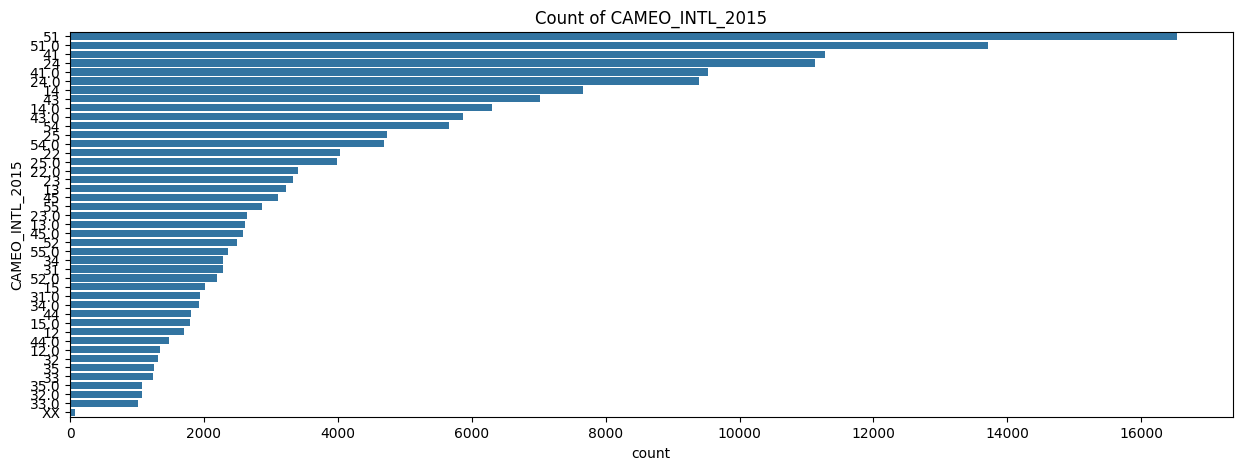

In [19]:
creat_count_plot("Count of CAMEO_INTL_2015", df=azdias, plotted_column = "CAMEO_INTL_2015")

`D19_LETZTER_KAUF_BRANCHE`,

In [20]:
azdias["D19_LETZTER_KAUF_BRANCHE"].value_counts()

D19_UNBEKANNT             43975
D19_VERSICHERUNGEN        12835
D19_SONSTIGE              10253
D19_VOLLSORTIMENT          7843
D19_SCHUHE                 7311
D19_BUCH_CD                6303
D19_VERSAND_REST           5822
D19_DROGERIEARTIKEL        5355
D19_BANKEN_DIREKT          5145
D19_BEKLEIDUNG_REST        4897
D19_HAUS_DEKO              4658
D19_TELKO_MOBILE           3246
D19_ENERGIE                2657
D19_TELKO_REST             2575
D19_BANKEN_GROSS           2307
D19_BEKLEIDUNG_GEH         2272
D19_TECHNIK                1648
D19_KINDERARTIKEL          1618
D19_FREIZEIT               1565
D19_LEBENSMITTEL           1454
D19_BANKEN_REST            1173
D19_RATGEBER               1118
D19_NAHRUNGSERGAENZUNG      914
D19_DIGIT_SERV              772
D19_REISEN                  711
D19_SAMMELARTIKEL           551
D19_TIERARTIKEL             545
D19_HANDWERK                498
D19_WEIN_FEINKOST           480
D19_GARTEN                  373
D19_BANKEN_LOKAL            360
D19_BIO_

quality:

- has to be factorized

`EINGEFUEGT_AM`

In [21]:
azdias["EINGEFUEGT_AM"]

0                         NaN
1         1992-02-10 00:00:00
2         1992-02-12 00:00:00
3         1997-04-21 00:00:00
4         1992-02-12 00:00:00
                 ...         
199995    1992-02-10 00:00:00
199996    1995-02-07 00:00:00
199997    1992-02-10 00:00:00
199998    1992-02-10 00:00:00
199999    1992-02-10 00:00:00
Name: EINGEFUEGT_AM, Length: 200000, dtype: object

When looking at the excel `DIAS Attributes - Values 2017`, there are always integers which define `unknown`. These are mostly `-1`, `X` or `XX`.



quality:

has to be converted to datetime and then to [ordinal dates](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python)

# Preprocessing

In [22]:
print("Dropping null columns")
null_columns = azdias.columns[azdias.isnull().mean() > 0.5]
azdias = azdias.drop(columns=null_columns)

Dropping null columns


In [23]:
#defining object columns
object_columns = azdias.select_dtypes(include='object').columns

In [24]:
object_columns

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ'],
      dtype='object')

In [25]:
#CAMEO_DEU_2015
print(azdias["CAMEO_DEU_2015"].unique())
azdias.loc[azdias['CAMEO_DEU_2015'] == 'XX', "CAMEO_DEU_2015"] = np.NaN

print("\tfactorizing")
#factorizing the object columns
azdias["CAMEO_DEU_2015_factorized"] = pd.factorize(azdias['CAMEO_DEU_2015'])[0]
print(azdias["CAMEO_DEU_2015_factorized"].unique())


[nan '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C' 'XX']
	factorizing
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [26]:
#CAMEO_DEUG_2015
print("\nCAMEO_DEUG_2015: replacing `X` with np.NaN")
#replace 'X' with -1
azdias.loc[azdias['CAMEO_DEUG_2015'] == 'X', "CAMEO_DEUG_2015"] = np.NaN
#convert to float, int can not handle NaN
print("\tConverting to float")
azdias['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].astype(float)



CAMEO_DEUG_2015: replacing `X` with np.NaN
	Converting to float


In [27]:
#CAMEO_INTL_2015
print("\nCAMEO_INTL_2015: replacing `XX` with np.NaN")
azdias.loc[azdias['CAMEO_INTL_2015'] == 'XX', "CAMEO_INTL_2015"] = np.NaN
print("\tConverting to float")
azdias['CAMEO_INTL_2015'] = azdias['CAMEO_INTL_2015'].astype(float)


CAMEO_INTL_2015: replacing `XX` with np.NaN
	Converting to float


In [28]:
print("\nFactorizing object columns")
print("\tD19_LETZTER_KAUF_BRANCHE")
azdias["D19_LETZTER_KAUF_BRANCHE_factorized"] = pd.factorize(azdias['D19_LETZTER_KAUF_BRANCHE'])[0]
print("\tOST_WEST_KZ")
azdias["OST_WEST_KZ_factorized"] = pd.factorize(azdias['OST_WEST_KZ'])[0]

print("\nCreating column`EINGEFUEGT_AM_ordinal` and changing it to datetime ")
#convert EINGEFUEGT_AM to datetime
azdias["EINGEFUEGT_AM"] = pd.to_datetime(azdias['EINGEFUEGT_AM'])
print("\tChanging `EINGEFUEGT_AM_ordinal` to ordinal")
#create column _ordinal
azdias["EINGEFUEGT_AM_ordinal"] = azdias.loc[azdias["EINGEFUEGT_AM"].notnull()]["EINGEFUEGT_AM"].apply(lambda x: x.toordinal())


Factorizing object columns
	D19_LETZTER_KAUF_BRANCHE
	OST_WEST_KZ

Creating column`EINGEFUEGT_AM_ordinal` and changing it to datetime 
	Changing `EINGEFUEGT_AM_ordinal` to ordinal


In [29]:
#look at the results
azdias[["CAMEO_DEU_2015", "CAMEO_DEU_2015_factorized", 
        "CAMEO_DEUG_2015", "CAMEO_INTL_2015", 
        "D19_LETZTER_KAUF_BRANCHE", "D19_LETZTER_KAUF_BRANCHE_factorized", 
        "OST_WEST_KZ", "OST_WEST_KZ_factorized",
        "EINGEFUEGT_AM", "EINGEFUEGT_AM_ordinal"]]

,CAMEO_DEU_2015,CAMEO_DEU_2015_factorized,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,D19_LETZTER_KAUF_BRANCHE_factorized,OST_WEST_KZ,OST_WEST_KZ_factorized,EINGEFUEGT_AM,EINGEFUEGT_AM_ordinal
0,NaN,-1,NaN,NaN,NaN,-1,NaN,-1,NaT,NaN
1,8A,0,8.0,51.0,NaN,-1,W,0,1992-02-10,727238.0
2,4C,1,4.0,24.0,D19_UNBEKANNT,0,W,0,1992-02-12,727240.0
3,2A,2,2.0,12.0,D19_UNBEKANNT,0,W,0,1997-04-21,729135.0
4,6B,3,6.0,43.0,D19_SCHUHE,1,W,0,1992-02-12,727240.0
...,...,...,...,...,...,...,...,...,...,...
199995,1D,31,1.0,15.0,D19_BUCH_CD,9,O,1,1992-02-10,727238.0
199996,9B,15,9.0,51.0,D19_HAUS_DEKO,17,O,1,1995-02-07,728331.0
199997,7A,12,7.0,41.0,D19_SCHUHE,1,W,0,1992-02-10,727238.0
199998,2C,26,2.0,14.0,D19_LOTTO,26,W,0,1992-02-10,727238.0


all of the above will be put into the function `clean data` in `process_data.py`.

In [30]:
azdias = clean_data(azdias)

Dropping null columns above 0.5
CAMEO_DEU_2015
	factorizing

CAMEO_DEUG_2015: replacing `X` with np.NaN
	Converting to float

CAMEO_INTL_2015: replacing `XX` with np.NaN
	Converting to float

Factorizing object columns
	D19_LETZTER_KAUF_BRANCHE
	OST_WEST_KZ

Creating column`EINGEFUEGT_AM_ordinal` and changing it to datetime 
	Changing `EINGEFUEGT_AM_ordinal` to ordinal
	Changing `EINGEFUEGT_AM_ordinal` to to float


We shall drop the object columns 
- `CAMEO_DEU_2015` (created `CAMEO_DEU_2015_factorized`) 
- `D19_LETZTER_KAUF_BRANCHE` (created `D19_LETZTER_KAUF_BRANCHE_factorized`)
- `OST_WEST_KZ` (created `OST_WEST_KZ_factorized`)
- `EINGEFUEGT_AM` (created `EINGEFUEGT_AM_ordinal`)

We shall also drop the column `LNR` as it is not relevant for Machine Learning.


In [31]:
azdias = azdias.drop(columns=["CAMEO_DEU_2015","D19_LETZTER_KAUF_BRANCHE", "OST_WEST_KZ", "LNR", "EINGEFUEGT_AM"])

In [32]:
#In order to perform machine learning, we have to somehow get rid of the NaN values. This can be done via scikit-lean imputatation:
# https://scikit-learn.org/stable/modules/impute.html
null_count = azdias.isna().sum().sum()
not_null_count = azdias.notnull().sum().sum()
ratio = round(null_count/not_null_count,2)*100

print('Null values represent {}% of the dataset'.format(ratio))

#SimpleImputer provides basic strategies for missing values (mean, median, most frequent). We will chose `mean`
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(azdias)
#define `new` customers table with imputed values
azdias = pd.DataFrame(imp.transform(azdias),columns=azdias.columns)

#check for zero values
print(azdias.isnull().sum().sum())

Null values represent 10.0% of the dataset
0


In [33]:
#Last, we need to normalize the dataset. This will compute the original values to values between 0 and 1.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(azdias)

In [34]:
azdias_scaled

array([[-5.32529373e-01,  0.00000000e+00, -4.85562915e-16, ...,
        -7.91664988e-01, -2.05386874e+00,  0.00000000e+00],
       [-5.32529373e-01,  1.30616339e+00, -1.48846959e+00, ...,
        -7.91664988e-01, -1.22252022e-01, -4.61468844e-01],
       [-5.32529373e-01,  1.30616339e+00,  8.34985179e-01, ...,
        -6.64106394e-01, -1.22252022e-01, -4.60054226e-01],
       ...,
       [-5.32529373e-01, -9.87408537e-01,  5.61637559e-01, ...,
        -5.36547800e-01, -1.22252022e-01, -4.61468844e-01],
       [ 1.13888512e+00,  7.32770409e-01,  6.98311369e-01, ...,
         2.65241705e+00, -1.22252022e-01, -4.61468844e-01],
       [-5.32529373e-01,  1.30616339e+00, -1.48846959e+00, ...,
        -6.64106394e-01, -1.22252022e-01, -4.61468844e-01]])

#### CUSTOMERS

In [35]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

The columns of the two datasets are identical, except that customers has three extra columns:

- CUSTOMER_GROUP
- ONLINE_PURCHASE
- PRODUCT_GROUP

In [36]:
print("Number of customers: {}".format(customers.shape[0]))
print("Number of features: {}".format(customers.shape[1]))

Number of customers: 191652
Number of features: 369


In [37]:
customers.nunique()

LNR                     191652
AGER_TYP                     5
AKT_DAT_KL                   9
ALTER_HH                    21
ALTER_KIND1                 17
                         ...  
PRODUCT_GROUP                3
CUSTOMER_GROUP               2
ONLINE_PURCHASE              2
ANREDE_KZ                    2
ALTERSKATEGORIE_GROB         5
Length: 369, dtype: int64

In [38]:
#check out duplicates
customers.loc[customers["LNR"].duplicated()]

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In [39]:
print("Numnber of duplicates in unique identifier: {}".format(len(customers.loc[customers["LNR"].duplicated()])))

Numnber of duplicates in unique identifier: 0


In [40]:
data_exploration(customers)

SHAPE
(191652, 369)


NUMBER OF UNIQUES

LNR                           191652
EINGEFUEGT_AM                   3034
KBA13_ANZAHL_PKW                1250
ANZ_HAUSHALTE_AKTIV              216
ANZ_STATISTISCHE_HAUSHALTE       214
GEBURTSJAHR                      113
EXTSEL992                         56
VERDICHTUNGSRAUM                  46
CAMEO_DEU_2015                    45
CAMEO_INTL_2015                   43
LP_LEBENSPHASE_FEIN               41
D19_LETZTER_KAUF_BRANCHE          35
EINGEZOGENAM_HH_JAHR              33
MIN_GEBAEUDEJAHR                  32
ALTERSKATEGORIE_FEIN              25
ALTER_HH                          21
ANZ_HH_TITEL                      20
CAMEO_DEUG_2015                   19
ANZ_PERSONEN                      18
ALTER_KIND2                       17
dtype: int64


NUMBER OF ABSOLUTE NULLS
ALTER_KIND4        191416
ALTER_KIND3        190377
ALTER_KIND2        186552
ALTER_KIND1        179886
KK_KUNDENTYP       111937
EXTSEL992           85283
KBA05_KRSOBER       559

With the function above, it is visible that the same columns as in `azdias` have a high % of null values

In [41]:
customers.isnull().mean().sort_values(ascending=False).head(10)

ALTER_KIND4        0.998769
ALTER_KIND3        0.993347
ALTER_KIND2        0.973389
ALTER_KIND1        0.938607
KK_KUNDENTYP       0.584064
EXTSEL992          0.444989
KBA05_KRSOBER      0.292092
KBA05_KRSHERST1    0.292092
KBA05_GBZ          0.292092
KBA05_HERST1       0.292092
dtype: float64

In [42]:
customers.columns[customers.isnull().mean() > 0.4]

Index(['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'EXTSEL992',
       'KK_KUNDENTYP'],
      dtype='object')

`ALTER_KIND1`, `ALTER_KIND2`, `ALTER_KIND3`, `ALTER_KIND4`, `EXTSEL992`, `KK_KUNDENTYP` have null values above 0.4

In [43]:
object_columns = customers.select_dtypes(include='object').columns

In [44]:
empty_dict = {}

for column in object_columns:
    empty_dict[column] = customers[column].unique()

In [45]:
empty_dict

{'CAMEO_DEU_2015': array(['1A', nan, '5D', '4C', '7B', '3B', '1D', '9E', '2D', '4A', '6B',
        '9D', '8B', '5C', '9C', '4E', '6C', '8C', '8A', '5B', '9B', '3D',
        '2A', '3C', '5F', '7A', '1E', '2C', '7C', '5A', '2B', '6D', '7E',
        '5E', '6E', '3A', '9A', '4B', '1C', '1B', '6A', '8D', '7D', '6F',
        '4D', 'XX'], dtype=object),
 'CAMEO_DEUG_2015': array([1.0, nan, 5.0, 4.0, 7.0, 3.0, 9.0, 2.0, 6.0, 8.0, '6', '3', '8',
        '9', '2', '4', '1', '7', '5', 'X'], dtype=object),
 'CAMEO_INTL_2015': array([13.0, nan, 34.0, 24.0, 41.0, 23.0, 15.0, 55.0, 14.0, 22.0, 43.0,
        51.0, 33.0, 25.0, 44.0, 54.0, 32.0, 12.0, 35.0, 31.0, 45.0, 52.0,
        '45', '25', '55', '51', '14', '54', '43', '22', '15', '24', '35',
        '23', '12', '44', '41', '52', '31', '13', '34', '32', '33', 'XX'],
       dtype=object),
 'D19_LETZTER_KAUF_BRANCHE': array(['D19_UNBEKANNT', 'D19_BANKEN_GROSS', 'D19_NAHRUNGSERGAENZUNG',
        'D19_SCHUHE', 'D19_BUCH_CD', 'D19_DROGERIEARTIKEL', 'D19

`CAMEO_DEU_2015`
- factorized, 
- XX --> np.NaN

`CAMEO_DEUG_2015`
- X-->np.NaN
- converted to float

-`CAMEO_INTL_2015`
- converted to float 
- XX --> np.NaN

`D19_LETZTER_KAUF_BRANCHE`
- factorized

`EINGEFUEGT_AM`
- to_datetime 
- ordinal

`OST_WEST_KZ`
- factorized

`PRODUCT_GROUP`
- factorized

`CUSTOMER_GROUP`
factorized

In [46]:
customers = clean_data(df = customers)

Dropping null columns above 0.5
CAMEO_DEU_2015
	factorizing

CAMEO_DEUG_2015: replacing `X` with np.NaN
	Converting to float

CAMEO_INTL_2015: replacing `XX` with np.NaN
	Converting to float

Factorizing object columns
	D19_LETZTER_KAUF_BRANCHE
	OST_WEST_KZ

Creating column`EINGEFUEGT_AM_ordinal` and changing it to datetime 
	Changing `EINGEFUEGT_AM_ordinal` to ordinal
	Changing `EINGEFUEGT_AM_ordinal` to to float


In [47]:
#look at the results
customers[["CAMEO_DEU_2015", "CAMEO_DEU_2015_factorized", 
        "CAMEO_DEUG_2015", "CAMEO_INTL_2015", 
        "D19_LETZTER_KAUF_BRANCHE", "D19_LETZTER_KAUF_BRANCHE_factorized", 
        "OST_WEST_KZ", "OST_WEST_KZ_factorized",
        "EINGEFUEGT_AM", "EINGEFUEGT_AM_ordinal"]]

,CAMEO_DEU_2015,CAMEO_DEU_2015_factorized,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,D19_LETZTER_KAUF_BRANCHE_factorized,OST_WEST_KZ,OST_WEST_KZ_factorized,EINGEFUEGT_AM,EINGEFUEGT_AM_ordinal
0,1A,0,1.0,13.0,D19_UNBEKANNT,0,W,0,1992-02-12,727240.0
1,NaN,-1,NaN,NaN,D19_BANKEN_GROSS,1,NaN,-1,NaT,NaN
2,5D,1,5.0,34.0,D19_UNBEKANNT,0,W,0,1992-02-10,727238.0
3,4C,2,4.0,24.0,D19_NAHRUNGSERGAENZUNG,2,W,0,1992-02-10,727238.0
4,7B,3,7.0,41.0,D19_SCHUHE,3,W,0,1992-02-12,727240.0
...,...,...,...,...,...,...,...,...,...,...
191647,1C,37,1.0,14.0,D19_BANKEN_REST,23,W,0,1992-02-10,727238.0
191648,5B,18,5.0,32.0,D19_UNBEKANNT,0,W,0,1997-03-06,729089.0
191649,4D,43,4.0,24.0,D19_TECHNIK,7,W,0,1992-02-10,727238.0
191650,4C,2,4.0,24.0,D19_BANKEN_REST,23,W,0,1992-02-10,727238.0


Now we can drop the columns that have been factorized as well as the customer specific columns (`CUSTOMER_GROUP`, `ONLINE_PURCHASE` `PRODUCT_GROUP`).
We can also remove the unique identifier `LNR`

In [48]:
customers = customers.drop(columns=["CAMEO_DEU_2015", 
                                    "D19_LETZTER_KAUF_BRANCHE", 
                                    "OST_WEST_KZ", 
                                    "EINGEFUEGT_AM", 
                                    "CUSTOMER_GROUP", 
                                    "ONLINE_PURCHASE", 
                                    "PRODUCT_GROUP", "LNR"])

In [49]:
#In order to perform machine learning, we have to somehow get rid of the NaN values. This can be done via scikit-lean imputatation:
# https://scikit-learn.org/stable/modules/impute.html
null_count = customers.isna().sum().sum()
not_null_count = customers.notnull().sum().sum()

ratio = round(null_count/not_null_count,2)*100

print('Null values represent {}% of the dataset'.format(ratio))

imp.fit(customers)
#define `new` customers table with imputed values
customers = pd.DataFrame(imp.transform(customers),columns=customers.columns)

#check for zero values
print(customers.isnull().sum().sum())

customers_scaled = scaler.fit_transform(customers)

Null values represent 23.0% of the dataset
0


## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

As we have a large data is, we can use [Principal component analyis](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) to reduce the data.

This comes with an expense of accuracy but we gain simplicity.


In [50]:
#create an Pricipal component analysis instance
pca = PCA()

#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#Fit the model with X and apply the dimensionality reduction on X.
customer_pca = pca.fit_transform(customers_scaled)

Extract from: https://vitalflux.com/pca-explained-variance-concept-python-example/


"When we apply PCA, it is often important to understand how much of the variation in the data is explained by each principal component. 
This is where the concept of “explained variance” comes in. Explained variance measures the proportion of variance in the data that is explained by each principal components.  Each principal component is a linear combination of the original variables, and the first principal component captures the most variation in the data, the second principal component captures the second-most variation, and so on.

Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. In other words, it tells us how much of the total variance is “explained” by each component. This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis."

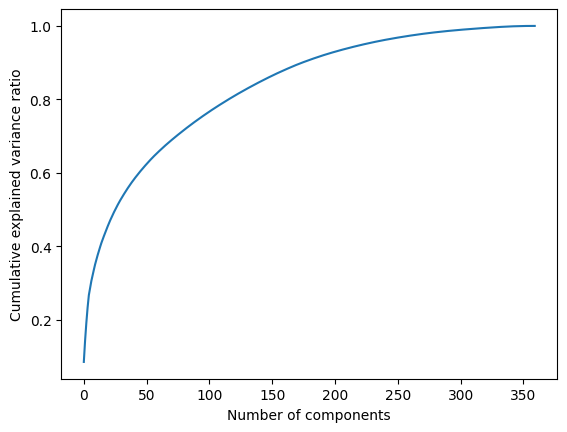

In [51]:

# We can now look at the cumulative explaine variance ratio
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio');

A commonly used guideline is to select the number of principal components that explain a cumulative variance of around 70-80%. This means that the selected principal components collectively capture 70-80% of the total variability in the data. This range is often considered a good balance between capturing a substantial amount of information while reducing the dimensionality of the data.

Hence, we will chose 0.8 as a threshhold.

In [52]:
# In order to maintain 80% of variance check the number of components needed
np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)<0.8)

116

In [53]:
# we can now Filter out our dataset to keep only those 116 components

pca = PCA(n_components=116)
pca.fit(customers_scaled)
customers_pca = pca.transform(customers_scaled)
customer_pca = pd.DataFrame(pca.components_, columns=customers.columns)
customer_pca.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA

In [54]:
customer_pca.shape

(116, 360)

In [55]:
customer_pca.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA

In [56]:
#transposed the DataFrame
customer_pca_T = customer_pca.T
customer_pca_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
AGER_TYP,0.074226,0.072173,-0.008163,0.013688,-0.123565,-0.007887,-0.005814,0.047188,0.065408,0.003843,-0.024115,0.017099,-0.025453,-0.001271,-0.007742,0.028058,-0.040075,0.002647,-0.003525,-0.006780,-0.001810,-0.001166,0.030961,0.019423,0.024370,-0.035334,-0.036011,0.017874,-0.031680,-0.064704,0.065123,0.060126,0.047070,-0.010633,-0.032047,-0.072021,0.013442,0.039464,0.025975,-0.017233,-0.017019,-0.052400,-0.012073,0.051516,0.002310,-0.037992,-0.092637,0.058617,-0.091064,-0.109080,0.010228,-0.051578,-0.032125,-0.017056,0.038088,0.055822,-0.035623,0.021633,0.062728,0.044119,-0.107193,0.026859,0.037349,-0.015267,-0.026848,0.012371,-0.050809,0.020785,-0.036095,-0.072719,-0.113002,-0.174180,0.032780,-0.007211,0.070296,-0.004653,-0.063709,0.089192,-0.057994,-0.012494,-0.022001,0.026886,-0.012336,0.068251,0.051643,-0.015851,-0.037641,-0.012824,0.032705,-0.001719,0.026764,0.017544,0.006303,0.003534,-0.033178,-0.023032,0.076165,-0.003609,0.069209,-0.039171,0.046825,-0.022953,-0.022606,0.033767,0.009224,-0.073754,0.017201,0.044914,-0.007291,0.022492,-0.029132,0.024947,-0.004604,-0.006489,-0.024189,0.043741
AKT_DAT_KL,-0.021766,0.017147,-0.007644,0.019696,0.024257,0.033333,0.027303,-0.074569,-0.018876,0.026229,0.023345,-0.023315,0.034641,0.016976,0.025203,0.013574,0.005360,-0.001841,0.010059,0.003161,0.025824,0.015839,0.035575,-0.004406,0.052310,0.010631,0.014945,-0.002726,0.029714,0.045799,-0.000392,0.011097,0.012513,0.013373,0.042589,0.039305,0.047496,-0.024520,0.007921,0.041068,0.017025,-0.026930,-0.014255,-0.022657,0.022118,0.055443,0.034677,0.029535,-0.015089,-0.167477,0.167584,-0.004930,0.053325,-0.107995,0.164090,0.128160,0.108162,0.008937,-0.055128,-0.052460,0.141514,0.074104,0.014905,0.021146,-0.087230,-0.056644,-0.046495,0.079607,0.115064,0.115206,0.114697,0.093003,0.040764,0.026126,0.009018,-0.040882,0.016005,-0.026322,0.058688,-0.040912,0.074609,0.011714,0.074475,-0.113549,0.257480,-0.133439,-0.120067,0.027819,-0.054466,0.069605,-0.107268,0.041524,0.045489,0.072788,0.144203,-0.112335,0.003547,-0.104042,0.102403,-0.024799,-0.132004,0.126647,0.030801,-0.136100,0.060914,0.048869,0.193551,-0.220066,-0.265260,-0.153673,0.049667,-0.127759,0.025006,-0.158599,0.054983,-0.139483
ALTER_HH,0.049480,-0.026691,-0.010882,-0.012547,0.130033,-0.014052,-0.003323,-0.006677,-0.027928,-0.015397,-0.000616,0.011503,-0.015849,0.003304,-0.036471,-0.081026,0.049919,-0.006140,0.027375,0.004325,-0.001490,-0.026962,-0.001154,-0.004468,-0.015350,-0.008163,0.028977,0.027191,0.029782,0.004683,-0.031319,0.019720,-0.016508,-0.007057,-0.020896,-0.017821,-0.027835,0.007568,-0.004656,-0.004482,-0.022944,0.037040,-0.014551,-0.067589,0.049344,-0.033926,-0.052477,0.003653,-0.049887,-0.028424,0.025887,0.010503,0.016120,-0.008377,0.070094,-0.024521,0.022989,0.052165,0.029134,0.074508,-0.181674,0.012716,-0.006975,-0.074812,-0.023237,0.015964,-0.076390,0.046175,-0.022262,-0.085784,-0.167942,-0.220871,-0.022449,0.061453,0.164461,0.017972,-0.033632,0.028248,0.005905,-0.008552,-0.070475,0.072896,-0.036081,0.014219,0.107322,-0.073453,-0.047686,0.024729,0.032986,-0.025011,-0.058973,0.056095,-0.002552,0.011046,-0.017228,-0.013561,0.073143,-0.022702,0.076727,-0.023992,-0.012305,-0.085754,0.013751,-0.004441,-0.013593,-0.004198,0.021200,-0.008708,-0.120916,-0.097288,0.024004,-0.008329,0.039558,-0.057149,-0.071391,0.033771
ALTERSKATEGORIE_FEIN,0.027764,-0.015375,-0.023209,-0.009379,0.151777,0.021968,0.025052,-0.096753,-0.053492,0.016685,0.020946,-0.040002,0.002168,0.018743,-0.030255,-0.038565,0.024702,-0.004453,0.021992,0.005641,0.002267,0.003601,-0.001693,-0.003545,0.005798,-0.005339,-0.046352,-0.003427,-0.014286,0.016811,-0.0

**PCA Analysis of top 2 components**

**Component 0**

Text(0, 0.5, 'Attribute Weight')

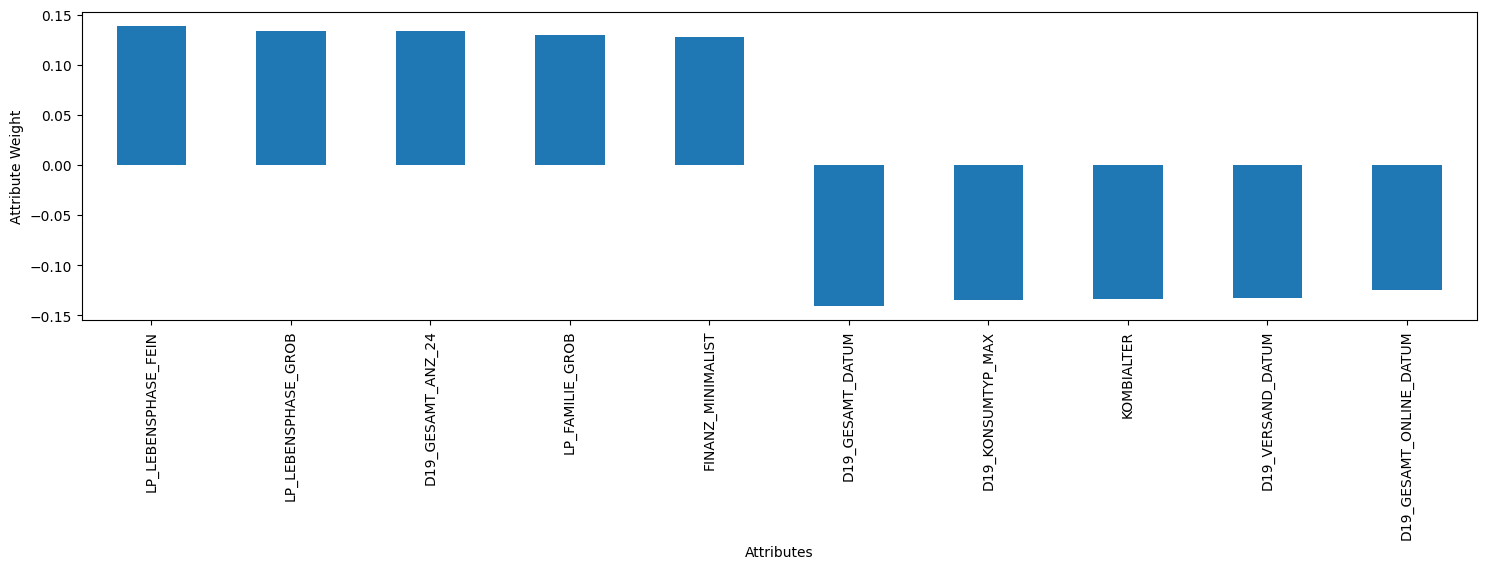

In [57]:
#We can sort the first component zero [0] to see which attributes have the lowest influence
customer_pca_T_low = customer_pca_T[0].sort_values(ascending=True).head(5)
customer_pca_T_high= customer_pca_T[0].sort_values(ascending=False).head(5)

df_top_bottom = pd.concat([customer_pca_T_high, customer_pca_T_low])

df_top_bottom.plot.bar(figsize=(18,4))
plt.xlabel('Attributes')
plt.ylabel('Attribute Weight')

Of component 0, the most important attributes are :

- `LP_LEBENSPHASE_FEIN`, 
- `LP_LEBENSPHASE_GROB`, 
- `D19_GESAMT_ANZ_24`, 
- `LP_FAMILIE_GROB`,
- `FINANZ_MINIMALIST'`

High values on lifestage columns, low values on Household columns

**Component 1**

Text(0, 0.5, 'Attribute Weight')

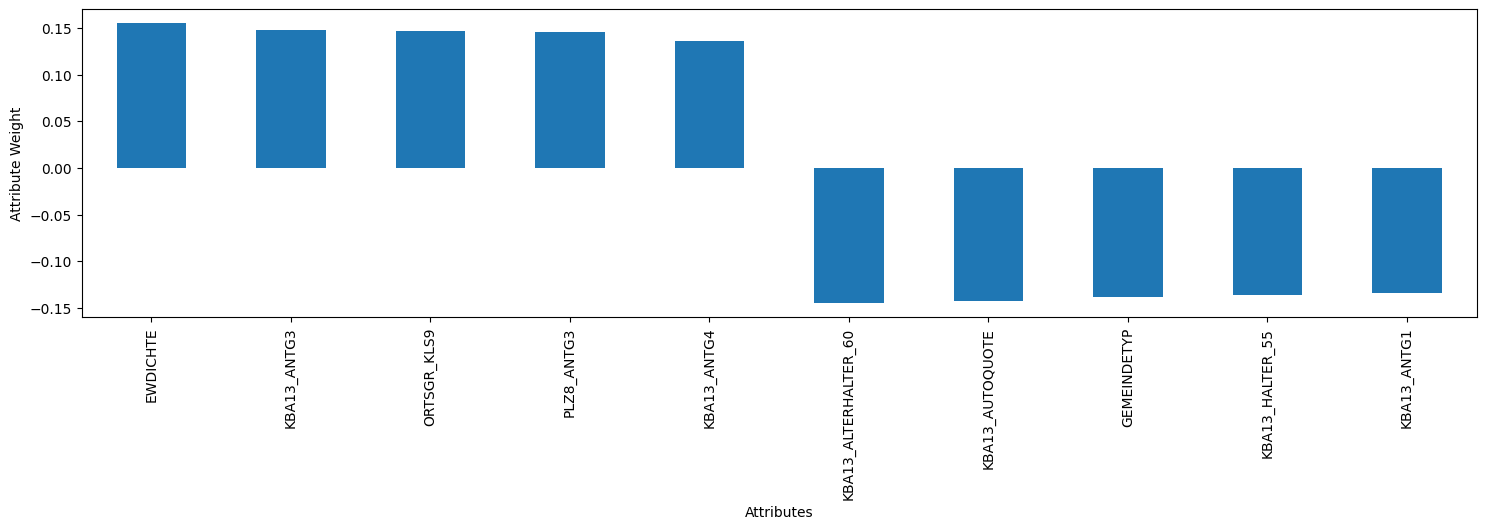

In [58]:
#We can sort the first component zero [0] to see which attributes have the lowest influence
customer_pca_T_low = customer_pca_T[1].sort_values(ascending=True).head(5)
customer_pca_T_high= customer_pca_T[1].sort_values(ascending=False).head(5)

df_top_bottom = pd.concat([customer_pca_T_high, customer_pca_T_low])

df_top_bottom.plot.bar(figsize=(18,4))
plt.xlabel('Attributes')
plt.ylabel('Attribute Weight')

In [59]:
customer_pca_T_high.index

Index(['EWDICHTE', 'KBA13_ANTG3', 'ORTSGR_KLS9', 'PLZ8_ANTG3', 'KBA13_ANTG4'], dtype='object')

Of component 1, the most important attributes are:

- `EWDICHTE`, (density of inhabitants per square kilometer)
- `KBA13_ANTG3`,
- `ORTSGR_KLS9` (size of the community), 
- `PLZ8_ANTG3`,(number of 6-10 family houses in the PLZ8)
- `KBA13_ANTG4'`

I do not see a pattern

In [60]:
customer_pca_T_low.index

Index(['KBA13_ALTERHALTER_60', 'KBA13_AUTOQUOTE', 'GEMEINDETYP',
       'KBA13_HALTER_55', 'KBA13_ANTG1'],
      dtype='object')

Of component 2, the least important attributes are:

- `KBA13_ALTERHALTER_60` (share of car owners between 46 and 60 within the PLZ8)
- `KBA13_AUTOQUOTE` (share of cars per household within the PLZ8)
- `GEMEINDETYP`
- `KBA13_HALTER_55` (share of car owners between 51 and 55 within the PLZ8)
- `KBA13_ANTG1`

Seems to be that unimportant attributes are related to old age.

**Clustering**

https://towardsdatascience.com/how-many-clusters-6b3f220f0ef5

Clustering is an unsupervised machine learning method that can identify groups of similar data points.
The goal of clustering is to group data points in clusters so that 

- (1) points within a cluster are as similar as possible, 
- (2) points belonging to different clusters are as distinct as possible


There are three widely knowns metrics:

- silhouette coefficient
- Elbow Method
- gap statistic



**silhouette coefficient**

In [61]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [62]:
## empty list where we will append the silhouette_score
#silhouette_coefficients = []
## We will start with 2 clusters and have at a max 20
#for k in range(2, 20):  
#   kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=3)
#   kmeans.fit(customers_pca)
#   score = silhouette_score(customers_pca, kmeans.labels_)
#   silhouette_coefficients.append(score)

In [63]:
#plt.plot(range(2, 20), silhouette_coefficients)
#plt.title("Silhouette Coefficient")
#plt.xlabel("Number of Clusters")
#plt.ylabel("Silhouette Coefficient")
#plt.xticks(range(2, 20))
#plt.show()

The silhouette_score peaks at 19 and thus defines the optimal number of clusters. 
The function above took quite long to run and I am not sure if 19 clusters means longer running time. Therefore, I will use 9 clusters as there is a peak as well.



![image](images/Silhouette_coefficient.jpg)

**elbow method**

In [64]:
## Determine the optimal number of clusters
#distortions = []
#K = range(1,10)
#for k in K:
#    kmeanModel = KMeans(n_clusters=k)
#    kmeanModel.fit(customers_pca)
#    distortions.append(kmeanModel.inertia_)
#
## Plot the elbow
#plt.plot(K, distortions, 'bx-')
#plt.xlabel('Number of clusters')
#plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal number of clusters')
#plt.show()

![image](images/elbow_method.jpg)

#https://towardsdatascience.com/how-many-clusters-6b3f220f0ef5

"The inertia is a decreasing function of the number of clusters k. However, its rate of decrease is different above or below the optimal number of clusters K. For k<K, the inertia decreases rapidly, whereas the decrease is slow for k>K. Thus, by plotting the inertia over a range of k, one can determine where the curve bends, or elbows, at K."

In the above picutre, I do not really see an elbox. We will use 9 clusters as seen in the Silhouette Coefficient

**gap statistic**

In [65]:

#def gap_statistic(data, refs=None, nrefs=10, max_clusters=10):
#    # Set the reference distributions if they are not provided
#    if refs is None:
#        refs = []
#        for i in range(nrefs):
#            ref = np.random.rand(*data.shape)
#            refs.append(ref)
#
#    gaps = np.zeros((max_clusters,))
#    sk = np.zeros((max_clusters,))
#    for k in range(1, max_clusters+1):
#        kmeans = KMeans(n_clusters=k)
#        kmeans.fit(data)
#        kmean_labels = kmeans.labels_
#        # Calculate the within-cluster dispersion for the current clustering
#        wk = kmeans.inertia_
#
#        # Calculate the average log within-cluster dispersion for each reference distribution
#        bwk = np.zeros(nrefs)
#        for i in range(nrefs):
#            ref = refs[i]
#            kmeans_ref = KMeans(n_clusters=k)
#            kmeans_ref.fit(ref)
#            kmean_labels_ref = kmeans_ref.labels_
#            wk_ref = kmeans_ref.inertia_
#            bwk[i] = np.log(wk_ref)
#
#        # Calculate the expected value of the average log within-cluster dispersion for the reference distributions
#        ek = np.mean(bwk)
#
#        # Calculate the standard deviation of the average log within-cluster dispersion for the reference distributions
#        sd_k = np.sqrt(np.sum((bwk - ek)**2) / nrefs)
#
#        # Calculate the gap statistic
#        gaps[k-1] = ek - np.log(wk)
#        sk[k-1] = sd_k
#
#    # Determine the optimal number of clusters as the smallest k for which the gap statistic is greater than the expected gap for k+1
#    k = np.argmax(gaps[:-1] - (gaps[1:] - sk[1:]))
#    return k+1
#
## Determine the optimal number of clusters using the gap statistic method
#k = gap_statistic(customers_pca, max_clusters=10)
#
## Fit the KMeans model to the data using the optimal number of clusters
#kmeans = KMeans(n_clusters=k)
#kmeans.fit(customers_pca)

In [66]:
## Plot the results
#plt.scatter(customers_pca[:, 0], customers_pca[:, 1], c=kmeans.labels_)
#plt.title(f"KMeans clustering with {k} clusters")
#plt.show()

![image](images/gap_statistics.jpg)

Summary:

- the gap stastic method suggests 9 clusters
- elbow method did not yield a visible cluster suggestion
- the Silhouette Coefficient also peaked at 9 clusters. 

So we will use 9 clusters!


In [67]:
#Create an instance of a K Means model with 9 clusters.
kmeans = KMeans(n_clusters = 9)
kmeans.fit(customers_pca)
customers_k= kmeans.predict(customers_pca)
customers_k = pd.DataFrame(customers_k)

/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
pca = PCA(n_components=116)
pca.fit(azdias_scaled)
azdias_pca = pca.transform(azdias_scaled)
kmeans = KMeans(n_clusters = 9)
kmeans.fit(azdias_pca)
azdias_k= kmeans.predict(azdias_pca)
azdias_k = pd.DataFrame(azdias_k)

/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
azdias_k.value_counts()

3    32193
5    31441
7    31081
1    23635
2    21977
6    19624
4    19564
0    17138
8     3347
dtype: int64

**Clusters Analysis**

In [70]:
clusters_df_azdias = pd.DataFrame(azdias_k.value_counts().sort_index(), columns= ["Azdias"]).reset_index().rename(columns={0: "Cluster"})
clusters_df_customers = pd.DataFrame(customers_k.value_counts().sort_index(), columns= ["Customers"]).reset_index()


In [71]:
cluster_df = pd.concat([clusters_df_azdias, clusters_df_customers], axis=1)
cluster_df = cluster_df[["Cluster", "Azdias", "Customers"]]

In [72]:
cluster_df

,Cluster,Azdias,Customers
0,0,17138,8483
1,1,23635,27195
2,2,21977,46963
3,3,32193,17532
4,4,19564,22187
5,5,31441,37204
6,6,19624,18690
7,7,31081,12465
8,8,3347,933


<AxesSubplot: xlabel='Cluster'>

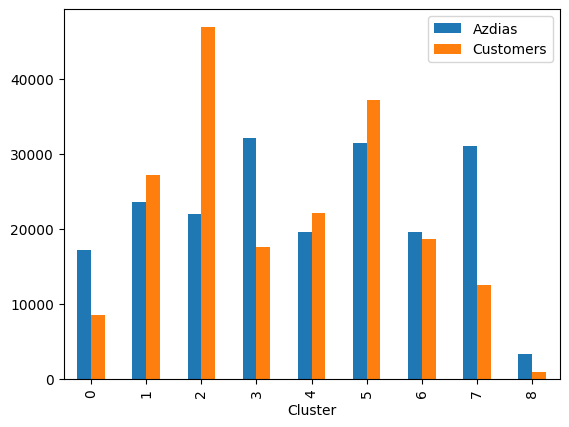

In [73]:
cluster_df.set_index("Cluster").plot(kind = "bar")

This chart is not that informative as the dataframes do not have a uniform length. It is more interesting to have a view on the relative distribution.

In [74]:
cluster_df_relative = cluster_df


cluster_df_relative["Azdias"] = cluster_df_relative["Azdias"]/cluster_df_relative["Azdias"].sum()
cluster_df_relative["Customers"] = cluster_df_relative["Customers"]/cluster_df_relative["Customers"].sum()

Text(0, 0.5, '% of total')

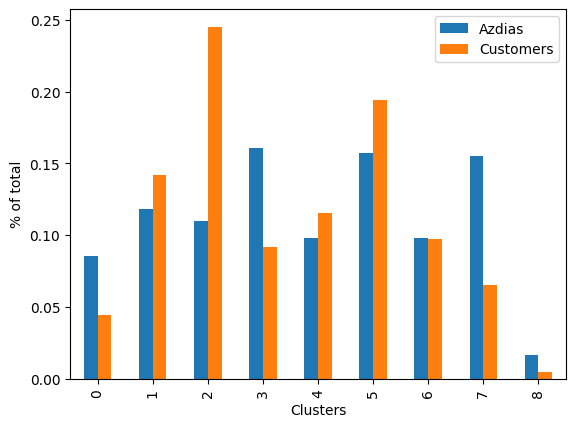

In [75]:
cluster_df_relative.set_index("Cluster").plot(kind = "bar")
plt.xlabel('Clusters')
plt.ylabel('% of total')

Cluster 2 and 6 show significant differences. Clusters 1, 6 & 7 seem to be very relevant for becoming a customer.

In [76]:
weights = kmeans.cluster_centers_[1]

In [77]:
cluster_dive = pd.DataFrame({"Weights":weights, "Component":list(range(116))})

In [78]:
cluster_dive.sort_values("Weights", ascending=False, inplace=True, ignore_index=True)

In [79]:
cluster_dive[:3]

,Weights,Component
0,4.231017,0
1,3.623162,4
2,0.660673,10


Three strongest components are `2`, `1`, `8`

In [80]:
customer_pca_T[6].sort_values(ascending=False).head(2)

KBA13_KW_61_120    0.215167
KBA13_KMH_210      0.195458
Name: 6, dtype: float64

In [81]:
clusters_selected = [1,6]
unique_comp = []

for cluster in clusters_selected:
    weights = kmeans.cluster_centers_[cluster]
    #define a dataframe with the weights and the components
    cluster_dive = pd.DataFrame({"Weights":weights, "Component":list(range(116))})
    #when we sort with `Weights`, we have the strongest components at the top
    cluster_dive.sort_values("Weights", ascending=False, inplace=True, ignore_index=True)
    print("CLUSTER {}\n ----------- \n".format(cluster))
    #select the first component of the top 2 componet
    for comp in cluster_dive[:3]['Component'].values:
        
        component = customer_pca_T[comp].sort_values(ascending=False)
        component_high = component.head(2)
        component_low = component.tail(2)
        component_concat = pd.concat([component_high, component_low], axis=0)
        print("Component {} \n".format(comp))
        print(component_concat)
        print("\n")
        unique_comp.append(comp)
unique_comp = set(unique_comp)

CLUSTER 1
 ----------- 

Component 0 

LP_LEBENSPHASE_FEIN    0.138690
LP_LEBENSPHASE_GROB    0.134220
D19_KONSUMTYP_MAX     -0.134382
D19_GESAMT_DATUM      -0.140644
Name: 0, dtype: float64


Component 4 

CJT_TYP_1           0.164088
CJT_TYP_2           0.159272
CJT_TYP_6          -0.143354
FINANZ_VORSORGER   -0.169154
Name: 4, dtype: float64


Component 10 

KBA13_KRSHERST_AUDI_VW     0.150777
KBA13_HERST_AUDI_VW        0.149838
KBA13_SEG_GROSSRAUMVANS   -0.238138
KBA13_SEG_VAN             -0.239100
Name: 10, dtype: float64


CLUSTER 6
 ----------- 

Component 8 

FINANZ_HAUSBAUER     0.141969
ANREDE_KZ            0.141313
KBA13_KMH_140_210   -0.131580
SEMIO_KULT          -0.178041
Name: 8, dtype: float64


Component 7 

CJT_TYP_3                0.179570
CJT_TYP_4                0.158702
VK_ZG11                 -0.169761
PRAEGENDE_JUGENDJAHRE   -0.169896
Name: 7, dtype: float64


Component 0 

LP_LEBENSPHASE_FEIN    0.138690
LP_LEBENSPHASE_GROB    0.134220
D19_KONSUMTYP_MAX     -0.1

The most important components were `2`,`1`,`8` 

**Cluster 1**

In Cluster 1, 

The top two attributes that influenced component 2 were 
1. KBA13_HERST_BMW_BENZ 
2. KBA05_KW3

The top two attributes that influenced component 1 were 
1. EWDICHTE 
2. KBA13_ANTG3


**Cluster 6**

In Cluster 6, 

The top two attributes that influenced component 6 were 
1. EWDICHTE 
2. KBA13_ANTG3

The top two attributes that influenced component 4 were 
1. CJT_TYP_1 
2. CJT_TYP_2 

- From component 6 in Cluster 1, we can learn that the bigger the car, the better!


## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [128]:
mailout_train = pd.read_csv('Udacity_MAILOUT_052018_TRAIN.csv', index_col= 0 )

/tmp/ipykernel_443/796407370.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  mailout_train = pd.read_csv('Udacity_MAILOUT_052018_TRAIN.csv', index_col= 0 )


In [129]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In [130]:
#check out the responses
mailout_train['RESPONSE'].value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [131]:
mailout_train = clean_data(mailout_train)

Dropping null columns above 0.5
CAMEO_DEU_2015
	factorizing

CAMEO_DEUG_2015: replacing `X` with np.NaN
	Converting to float

CAMEO_INTL_2015: replacing `XX` with np.NaN
	Converting to float

Factorizing object columns
	D19_LETZTER_KAUF_BRANCHE
	OST_WEST_KZ

Creating column`EINGEFUEGT_AM_ordinal` and changing it to datetime 
	Changing `EINGEFUEGT_AM_ordinal` to ordinal
	Changing `EINGEFUEGT_AM_ordinal` to to float


In [132]:
mailout_train = mailout_train.drop(columns=["CAMEO_DEU_2015","D19_LETZTER_KAUF_BRANCHE", "OST_WEST_KZ", "LNR", "EINGEFUEGT_AM"])

In [133]:
mailout_train

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA

In [134]:
# We create the target = RESPONSE
target = mailout_train['RESPONSE']

In [135]:
mailout_train.drop(columns=['RESPONSE'], inplace=True)

In [136]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [137]:
imputer.fit(mailout_train)
mailout_train = pd.DataFrame(imputer.fit_transform(mailout_train),columns=mailout_train.columns)

mailout_train_scaled = scaler.fit_transform(mailout_train)

In [138]:
mailout_train

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA

In [170]:
#define training columns
X_train = mailout_train_scaled
#define target column
y_train = target

We will try three different estimators:

- Logistic regression
- Linear regression
- Random forst

Benefits of Logistic Regression:

- Interpretability: Logistic regression provides a clear interpretation of the relationship between the independent variables and the predicted probability of the outcome. 
- Efficiency with small datasets: Logistic regression can perform well with small to moderate-sized datasets
- less pronve to overfitting: Logistic regression is a simpler model and less prone to overfitting, especially when the number of features is small relative to the number of observations.
- Well-suited for linear relationships: assumed linear relationship between independent variables

Benefits of Random Forest:



- Non-linearity and complex relationships: Random forest models can capture non-linear relationships and interactions between variables effectively. 
- Robustness to outliers and missing values: Random forests are generally robust to outliers and missing data 
- Less sensitive to hyperparameters: Random forests are generally less sensitive to the choice of hyperparameters compared to logistic regression.


As the data has according to my gut-feeling linear relationships between each other, Logistic regression may perform better!

In [140]:
#benchmark without hyperparameters
lr = LogisticRegression()
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
grid = GridSearchCV(estimator=lr,param_grid={}, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)
lr_best_score = grid.best_score_
lr_best_params = grid.best_params_

/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

As a scoring, we will use "roc_auto". This means that the receiver operating characteristic (ROC) curve´s area under the curve AUC will be used as an evaluation metric. THE ROC works well in a binary classification model which is the case in this project.

In [141]:
print(lr_best_score)
print(lr_best_params)

0.6621864144343792
{}


In [142]:
grid.cv_results_

{'mean_fit_time': array([2.18314176]),
 'std_fit_time': array([0.20773832]),
 'mean_score_time': array([0.0070158]),
 'std_score_time': array([0.00122156]),
 'params': [{}],
 'split0_test_score': array([0.64043306]),
 'split1_test_score': array([0.64864615]),
 'split2_test_score': array([0.6870417]),
 'split3_test_score': array([0.66433671]),
 'split4_test_score': array([0.67047446]),
 'mean_test_score': array([0.66218641]),
 'std_test_score': array([0.01641735]),
 'rank_test_score': array([1], dtype=int32)}

You see above that the `mean_test_score` is 0.66270228 which is equivalent to `grid.best_score_`

To see which parameters to tune for a logistic regression, check out: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [143]:
# Grid search to optimize parameters
#https://learn.udacity.com/nanodegrees/nd025/parts/cd0018/lessons/ls12134/concepts/9d2bc322-ffb0-4e4d-bc20-38eb8e03a979
lr = LogisticRegression()
param_grid ={
    'max_iter': [100,1000],
    'C':[0.001, 0.01, 0.1],
    'penalty':['l1', 'l2'],
    'solver': ['saga']
}
grid = GridSearchCV(estimator=lr,param_grid=param_grid, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)
lr_best_score = grid.best_score_
lr_best_params = grid.best_params_

/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/tobias_groeschner/.cache/pypoetry/virtualenvs/udacity-data-scientist-6c2o0tUl-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  war

In [144]:
print(grid.best_score_)
print(grid.best_params_)

0.689973895826761
{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [145]:
#benchmark without hyperparameters
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=  100)
grid = GridSearchCV(rf,param_grid={}, scoring="roc_auc", cv = 5)
grid.fit(X_train, y_train)
rf_best_score = grid.best_score_
rf_best_params = grid.best_params_

In [146]:
print(grid.best_score_)

0.650722945377936


In [147]:

lr = LinearRegression()
grid = GridSearchCV(lr,param_grid={}, scoring="roc_auc", cv = 5)
grid.fit(X_train, y_train)
rf_best_score = grid.best_score_
rf_best_params = grid.best_params_

In [148]:
print(grid.best_score_)

0.6555424814395984


In [149]:
#We now select the best model
lf = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')
best_est = lf.fit(X_train,y_train)
best_est

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

Applying Model to test dataset 

In [159]:
mailout_test = pd.read_csv('Udacity_MAILOUT_052018_TEST.csv', index_col=0)

/tmp/ipykernel_443/2712900682.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  mailout_test = pd.read_csv('Udacity_MAILOUT_052018_TEST.csv', index_col=0)


In [160]:
mailout_test = clean_data(mailout_test)


Dropping null columns above 0.5
CAMEO_DEU_2015
	factorizing

CAMEO_DEUG_2015: replacing `X` with np.NaN
	Converting to float

CAMEO_INTL_2015: replacing `XX` with np.NaN
	Converting to float

Factorizing object columns
	D19_LETZTER_KAUF_BRANCHE
	OST_WEST_KZ

Creating column`EINGEFUEGT_AM_ordinal` and changing it to datetime 
	Changing `EINGEFUEGT_AM_ordinal` to ordinal
	Changing `EINGEFUEGT_AM_ordinal` to to float


In [161]:
ids = mailout_test['LNR']
mailout_test = mailout_test.drop(columns=["CAMEO_DEU_2015", "D19_LETZTER_KAUF_BRANCHE", "OST_WEST_KZ", "EINGEFUEGT_AM", "LNR"])

In [162]:
imputer.fit(mailout_test)

SimpleImputer()

In [163]:
mailout_test = pd.DataFrame(imputer.fit_transform(mailout_test),columns=mailout_test.columns)

In [164]:
mailout_test.shape

(42833, 360)

In [165]:
mailout_test_scaled = scaler.fit_transform(mailout_test)

In [166]:
mailout_test_scaled.shape

(42833, 360)

In [167]:
best_est

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

In [168]:
predict = best_est.predict_proba(mailout_test_scaled)
predict

array([[0.96922379, 0.03077621],
       [0.96344917, 0.03655083],
       [0.99543488, 0.00456512],
       ...,
       [0.99078872, 0.00921128],
       [0.99202339, 0.00797661],
       [0.99327166, 0.00672834]])

In [169]:

results = pd.DataFrame({"LNR":ids.values, "Prediction":predict[:,1]})
results = results.sort_values(by=["Prediction"], ascending=False)
results

,LNR,Prediction
31527,69269,0.224611
23805,22176,0.196842
25563,36601,0.157866
19760,53058,0.156770
6007,52415,0.154255
...,...,...
38151,63575,0.000108
28126,78757,0.000101
24738,30664,0.000098
26975,81144,0.000095
